In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/l/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [47]:
df = pd.read_csv('data/Train.csv', parse_dates=['saledate'])

/Users/l/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.groupby('ProductGroupDesc')['SalePrice'].describe().unstack(level=-1)

,count,mean,std,min,25%,50%,75%,max
ProductGroupDesc,,,,,,,,
Backhoe Loaders,79415,20897.352553,7601.831029,7500,15000,20500,26000,40000
Motor Graders,25489,47251.564518,32765.783030,8000,19000,40000,67000,142000
Skid Steer Loaders,43488,10549.458563,3551.567838,4750,7900,10000,13000,20000
Track Excavators,101167,35666.120622,23618.215130,7500,17000,29000,49000,110000
Track Type Tractors,80520,36158.412221,24338.874294,8000,18000,29000,46000,127500
Wheel Loader,71046,37052.463249,22596.334012,8000,18500,32000,51000,107000


In [4]:
null_count = df['MachineHoursCurrentMeter'].isnull().sum()
print null_count, np.round(null_count.astype(float)/len(df),3)

258360 0.644


In [40]:
print 'MachineHoursCurrentMeter null count:'
nulls_df = df.groupby(['ProductGroupDesc'])[['MachineHoursCurrentMeter']].apply(lambda col: col.isnull().sum())
nulls_df.columns = ['Count']
nulls_df['percentage'] = nulls_df['Count'].astype(float) / df.groupby(['ProductGroupDesc'])['SalePrice'].count()
nulls_df

MachineHoursCurrentMeter null count:


,Count,percentage
ProductGroupDesc,,
Backhoe Loaders,53026,0.667708
Motor Graders,16588,0.650791
Skid Steer Loaders,26678,0.613457
Track Excavators,64859,0.641108
Track Type Tractors,51679,0.641816
Wheel Loader,45530,0.640852


In [41]:
print 'UsageBand null count:'
nulls_df = df.groupby(['ProductGroupDesc'])[['UsageBand']].apply(lambda col: col.isnull().sum())
nulls_df.columns = ['Count']
nulls_df['percentage'] = nulls_df['Count'].astype(float) / df.groupby(['ProductGroupDesc'])['SalePrice'].count()
nulls_df

UsageBand null count:


,Count,percentage
ProductGroupDesc,,
Backhoe Loaders,66908,0.842511
Motor Graders,22709,0.890933
Skid Steer Loaders,32726,0.752529
Track Excavators,81275,0.803375
Track Type Tractors,67666,0.840363
Wheel Loader,60202,0.847366


In [45]:
print 'UsageBand null count:'
nulls_df = df.groupby(['ProductGroupDesc'])[['YearMade']].apply(lambda col: col.isnull().sum())
nulls_df.columns = ['Count']
nulls_df['percentage'] = nulls_df['Count'].astype(float) / df.groupby(['ProductGroupDesc'])['SalePrice'].count()
nulls_df

UsageBand null count:


,Count,percentage
ProductGroupDesc,,
Backhoe Loaders,0,0
Motor Graders,0,0
Skid Steer Loaders,0,0
Track Excavators,0,0
Track Type Tractors,0,0
Wheel Loader,0,0


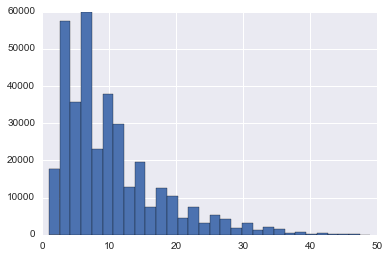

In [53]:
age = df['saledate'].dt.year - df['YearMade']
age = age[age > 0]
age = age[age < 50]
age.hist(bins = 30)

In [63]:
pd.concat([df, pd.get_dummies(df['Forks'])[1:]], axis=1)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,Age,None or Unspecified,Yes
0,1139246,66000,999089,3157,121,3,2004,68,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2,NaN,NaN
1,1139248,57000,117657,77,121,3,1996,4640,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,8,1,0
2,1139249,10000,434808,7009,121,3,2001,2838,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,0
3,1139251,38500,1026470,332,121,3,2001,3486,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0,0
4,1139253,11000,1057373,17311,121,3,2007,722,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
5,1139255,26500,1001274,4605,121,3,2004,508,Low,2008-12-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,0
6,1139256,21000,772701,1937,121,3,1993,11540,High,2004-08-26,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,11,0,0
7,1139261,27000,902002,3539,121,3,2001,4883,High,2005-11-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,0
8,1139272,21500,1036251,36003,121,3,2008,302,Low,2009-08-27,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,1,0,0
9,1139275,65000,1016474,3883,121,3,1000,20700,Medium,2007-08-09,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1007,1,0


In [ ]:
df['datasource'].unique()

In [ ]:
df.groupby(['datasource']).get_group(172).isnull().sum()

Observations:
* columns to watch: `MachineHoursCurrentMeter`, `UsageBand`
* low NaN: 121, 172
* medium NaN: 136
* high NaN: 132, 149